# Linear Discriminant Analysis

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


In [ ]:
## 1. Chargement des données
df = pd.read_csv('celldata.csv')

# Séparer la cible (Y) et les variables explicatives (X)
X = df.drop('Churn', axis=1)
y = df['Churn']

## 2. Définition des Catégories de Variables
# Variables numériques continues 
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Salary']

# Variables catégorielles nominales 
categorical_features = ['Geography', 'Gender']

# Variables binaires déjà bianires 
binary_features = ['HasCrCard', 'IsActiveMember']


## 3. Création du Préprocesseur 

preprocessor = ColumnTransformer(
    transformers=[
        # 1. Standardisation pour les variables numériques
        ('num', StandardScaler(), numerical_features),
        
        # 2. Encodage One-Hot pour les variables catégorielles
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        
        # 3. Passer les variables binaires directement
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop' 
)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## 4. Implémentation et Évaluation de LDA et QDA

### a) Linear Discriminant Analysis (LDA)

print("--- Résultats Linear Discriminant Analysis (LDA) ---")

# Création du Pipeline
lda_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LinearDiscriminantAnalysis())])

# Entraînement
lda_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_lda = lda_pipeline.predict(X_test)
y_proba_lda = lda_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_lda = roc_auc_score(y_test, y_proba_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)

print(f"Accuracy (Précision globale) : {accuracy_lda:.4f}")
print(f"Recall (Rappel) - Churn : {recall_lda:.4f}")
print(f"Precision (Précision) - Churn : {precision_lda:.4f}") 
print(f"F1-Score : {f1_lda:.4f}")
print(f"AUC : {auc_lda:.4f} ")


### b) Quadratic Discriminant Analysis (QDA)

print("\n--- Résultats Quadratic Discriminant Analysis (QDA) ---")

# Création du Pipeline
qda_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', QuadraticDiscriminantAnalysis())])

# Entraînement
qda_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_qda = qda_pipeline.predict(X_test)
y_proba_qda = qda_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_qda = roc_auc_score(y_test, y_proba_qda)
recall_qda = recall_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)

print(f"Accuracy (Précision globale) : {accuracy_qda:.4f}")
print(f"Recall (Rappel) - Churn : {recall_qda:.4f}")
print(f"Precision (Précision) - Churn : {precision_qda:.4f}")
print(f"F1-Score : {f1_qda:.4f}")
print(f"AUC : {auc_qda:.4f} ")

--- Résultats Linear Discriminant Analysis (LDA) ---
Accuracy (Précision globale) : 0.8087
Recall (Rappel) - Churn : 0.2195
Precision (Précision) - Churn : 0.5638
F1-Score : 0.3159
AUC : 0.7598 

--- Résultats Quadratic Discriminant Analysis (QDA) ---
Accuracy (Précision globale) : 0.5312
Recall (Rappel) - Churn : 0.6874
Precision (Précision) - Churn : 0.2542
F1-Score : 0.3712
AUC : 0.6294 


c:\Users\djaro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\djaro\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [61]:
## c) Logistic Regression

print("\n--- Résultats Logistic Regression ---")

# Création du Pipeline (C=1.0 est la régularisation par défaut)
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Entraînement
lr_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_lr = roc_auc_score(y_test, y_proba_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr) 

print(f"Accuracy (Précision globale) : {accuracy_lr:.4f}")
print(f"Recall (Rappel) - Churn : {recall_lr:.4f}")
print(f"Precision (Précision) - Churn : {precision_lr:.4f}")
print(f"F1-Score : {f1_lr:.4f}")
print(f"AUC : {auc_lr:.4f}")


## d) KNN (K-Nearest Neighbors)

# Nous allons utiliser K=5 comme valeur par défaut, une validation croisée pourrait optimiser ce paramètre.
print("\n--- Résultats K-Nearest Neighbors (KNN, K=5) ---")

# Création du Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Entraînement
knn_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_knn = roc_auc_score(y_test, y_proba_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn) 


print(f"Accuracy (Précision globale) : {accuracy_knn:.4f}")
print(f"Recall (Rappel) - Churn : {recall_knn:.4f}")
print(f"Precision (Précision) - Churn : {precision_knn:.4f}")
print(f"F1-Score : {f1_knn:.4f}")
print(f"AUC : {auc_knn:.4f}")


--- Résultats Logistic Regression ---
Accuracy (Précision globale) : 0.8121
Recall (Rappel) - Churn : 0.1946
Precision (Précision) - Churn : 0.6026
F1-Score : 0.2942
AUC : 0.7563

--- Résultats K-Nearest Neighbors (KNN, K=5) ---
Accuracy (Précision globale) : 0.8396
Recall (Rappel) - Churn : 0.4099
Precision (Précision) - Churn : 0.6644
F1-Score : 0.5070
AUC : 0.7785


In [ ]:
## e) AdaBoost (Adaptive Boosting)

print("\n--- Résultats AdaBoost ---")

# Création de la Pipeline 
adaboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', AdaBoostClassifier(
                                        estimator=DecisionTreeClassifier(max_depth=1), 
                                        n_estimators=100,
                                        random_state=42))])

# Entraînement
adaboost_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_ada = adaboost_pipeline.predict(X_test)
y_proba_ada = adaboost_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_ada = roc_auc_score(y_test, y_proba_ada)
recall_ada = recall_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada) 
f1_ada = f1_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Accuracy (Précision globale) : {accuracy_ada:.4f}")
print(f"Recall (Rappel) - Churn : {recall_ada:.4f}")
print(f"Precision (Précision) - Churn : {precision_ada:.4f}")
print(f"F1-Score : {f1_ada:.4f}")
print(f"AUC : {auc_ada:.4f}")


## f) Gradient Boosting (GBM)

print("\n--- Résultats Gradient Boosting ---")

# Création du Pipeline
# Utilise la technique de gradient boosting pour construire une forêt d'arbres.
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(
                                   n_estimators=100, 
                                   learning_rate=0.1, 
                                   max_depth=3, 
                                   random_state=42))])

# Entraînement
gbm_pipeline.fit(X_train, y_train)

# Prédiction
y_pred_gbm = gbm_pipeline.predict(X_test)
y_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

# Évaluation des métriques clés
auc_gbm = roc_auc_score(y_test, y_proba_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm) 
f1_gbm = f1_score(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

print(f"Accuracy (Précision globale) : {accuracy_gbm:.4f}")
print(f"Recall (Rappel) - Churn : {recall_gbm:.4f}")
print(f"Precision (Précision) - Churn : {precision_gbm:.4f}")
print(f"F1-Score : {f1_gbm:.4f}")
print(f"AUC : {auc_gbm:.4f}")


--- Résultats AdaBoost ---
Accuracy (Précision globale) : 0.8604
Recall (Rappel) - Churn : 0.4493
Precision (Précision) - Churn : 0.7587
F1-Score : 0.5644
AUC : 0.8421

--- Résultats Gradient Boosting ---
Accuracy (Précision globale) : 0.8679
Recall (Rappel) - Churn : 0.4576
Precision (Précision) - Churn : 0.8007
F1-Score : 0.5823
AUC : 0.8678


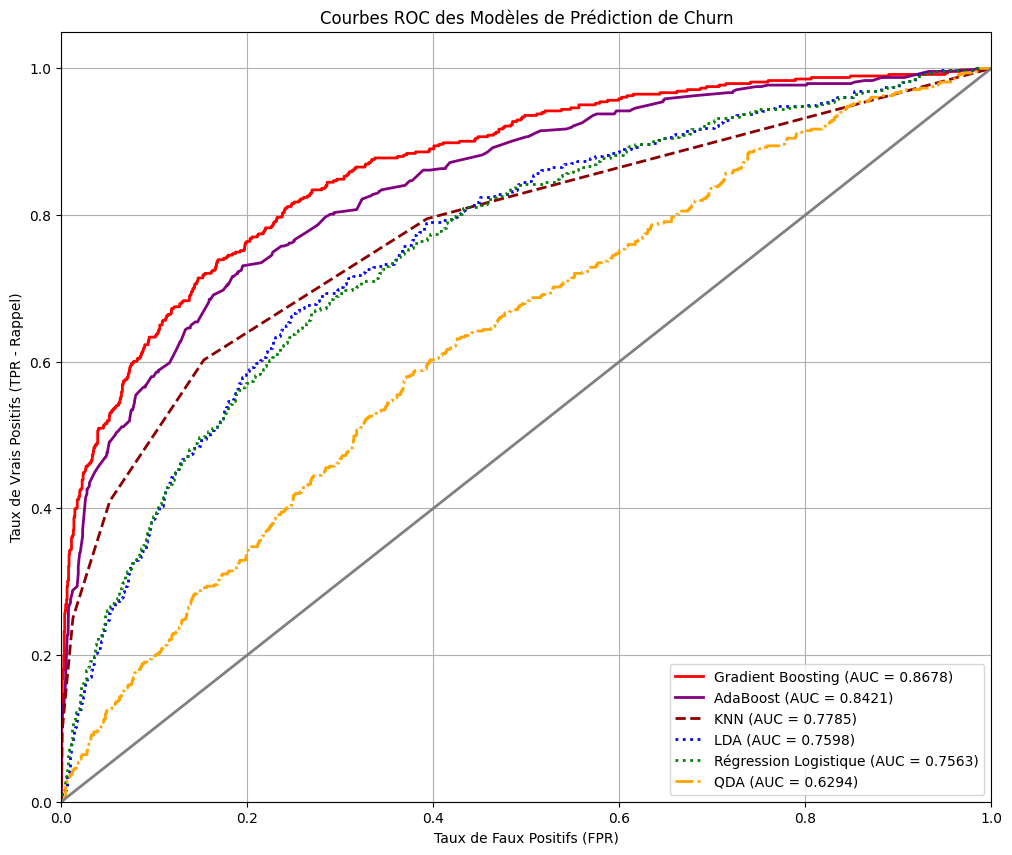

In [ ]:
# Calcul des Taux de Faux Positifs (FPR) et Taux de Vrais Positifs (TPR)

# 1. LDA
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_proba_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# 2. QDA
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_proba_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# 3. Régression Logistique (LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# 4. KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# 5. AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# 6. Gradient Boosting (GBM)
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)


# 2. Affichage de la Courbe ROC
plt.figure(figsize=(12, 10))


# Courbes pour chaque modèle, triées approximativement par performance attendue
plt.plot(fpr_gbm, tpr_gbm, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.4f})', linestyle='-')
plt.plot(fpr_ada, tpr_ada, color='purple', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.4f})', linestyle='-')
plt.plot(fpr_knn, tpr_knn, color='darkred', lw=2, label=f'KNN (AUC = {roc_auc_knn:.4f})', linestyle='--')
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label=f'LDA (AUC = {roc_auc_lda:.4f})', linestyle=':')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Régression Logistique (AUC = {roc_auc_lr:.4f})', linestyle=':')
plt.plot(fpr_qda, tpr_qda, color='orange', lw=2, linestyle='-.', label=f'QDA (AUC = {roc_auc_qda:.4f})')

# Ligne de référence (classification aléatoire)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-')

# Configuration du graphique
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR - Rappel)')
plt.title('Courbes ROC des Modèles de Prédiction de Churn')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()